In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('text', usetex=True)
rc('axes', facecolor='white')
rc('savefig', facecolor='white')
scale = .5
scaled_aspect = lambda s: (s * scale * 6.4, s * scale * 4.8)
rc('figure', figsize=scaled_aspect(1))

figs = Path('../figures')

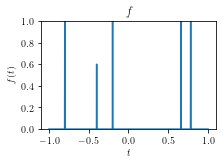

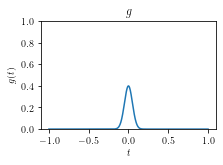

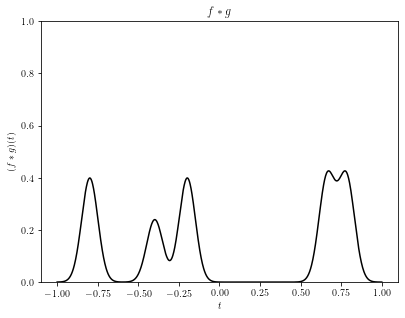

In [2]:
# Convolution
from scipy.stats import norm
np.random.seed(1)
xs = np.linspace(-1, 1, 1000)
gaussian = norm.pdf(20 * xs)
deltas = np.zeros_like(xs)
deltas[[100, 400, 830, 890]] = 1
deltas[[300]] = 0.6

plt.plot(xs, deltas)
plt.ylim(0, 1)
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.title('$f$')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.savefig(figs / 'deltas.pdf')
plt.show()

plt.plot(xs, gaussian)
plt.ylim(0, 1)
plt.xlabel('$t$')
plt.ylabel('$g(t)$')
plt.title('$g$')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.savefig(figs / 'gauss.pdf')
plt.show()

plt.plot(xs, np.convolve(gaussian, deltas, mode='same'), color='black')
plt.gcf().patch.set_facecolor('white')
plt.gcf().set_size_inches(*scaled_aspect(2))
plt.title('$f \\ast g$')
plt.xlabel('$t$')
plt.ylabel('$(f \\ast g)(t)$')
plt.ylim(0, 1)
plt.savefig(figs / 'convdelta.pdf')
plt.show()

Neural Network

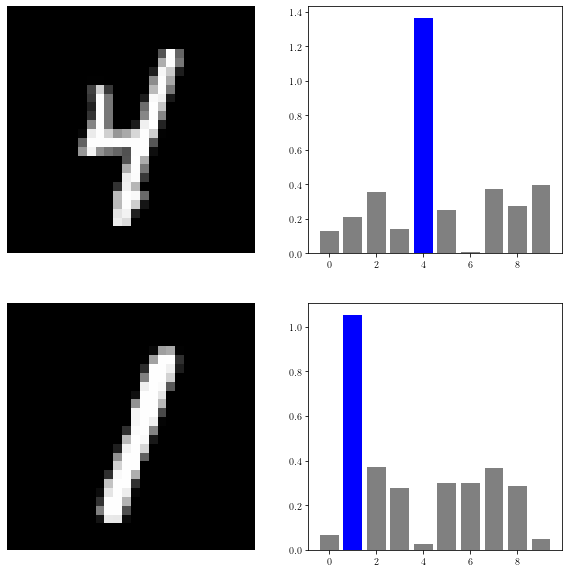

In [8]:
import tensorflow as tf
import tensorflow_datasets as ds
from tensorflow import keras

mnist = ds.load(name='mnist', split='train', data_dir='../data/tf')

il_pairs = []
for features in mnist.take(2):
    il_pairs.append((features['image'], features['label']))

# Plot MNIST with predictions

fig, axes = plt.subplots(2, 2)
fig.set_facecolor('white')
fig.set_size_inches(10, 10)
for i, (image, label) in enumerate(il_pairs):
    axes[i][0].imshow(image[..., 0], cmap='gray')
    axes[i][0].axis('off')
    probs = np.random.random(10) * 0.4 + [1 if i == label else 0 for i in range(10)]
    axes[i][1].bar(range(10), probs, color=['blue' if i == label else 'gray' for i in range(10)])
plt.savefig(figs / 'mnist_predictions.pdf')